# Material Balances XV

This lecture continues with a discussion of yield, selectivity, and optimization.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt
from scipy.integrate import solve_ivp
from scipy.interpolate import interp1d

## Example Problem 01

**This is a slightly modified version of Example 8.4 from Fogler**

The following pair of liquid-phase reactions occur in series. Each reaction is first order in its reactant.

\begin{align}
    A &\longrightarrow B\\
    B &\longrightarrow C \\
\end{align}

By "series" or "sequential" reactions we mean that a product of the first reaction is a reactant in a second reaction, and so on. These are very common systems in Chemical Reaction Engineering -- especially in the petrochemical industry, where we often make reactive things from inert alkanes.  Quite often, the reactive things we make then react away to form things we don't want.  Selectivity control in series reactions requires careful attention to operating conditions and reaction times (space times for flow reactors).

You carry out these reactions in a CSTR operating at steady state.  You may assume the density of the fluid does not change with reaction and so the inlet volumetric flowrate is equal to the outlet volumetric flowrate.  You have the following data available:

\begin{align}
    k_1 &= 0.5 \ \textrm{h}^{-1} \\
    k_2 &= 0.2 \ \textrm{h}^{-1} \\
    C_{Af} &= 20 \ \textrm{mol} \ \textrm{L}^{-1}
\end{align} 

Find the space time required to maximize the **yield** of B (with respect to A) in this CSTR.

### Solution to Example Problem 01

To get yields, selectivities, and conversions, we need to write material balances on all species.  This allows us to determine the exit molar flowrates of all species. This problem is a bit unique in that we can solve balances for A, B, and C sequentially.  This is enabled by the fact that the balance on A is independent of species B; solving the balance on A enables us to solve the balance on B; the balance on B is independent of species C; and solving the balance on B enables us to solve the balance on C.  See below.

#### Material Balance on A:

$$0 = F_{A,f} - F_A + R_AV$$

We aren't given a ton of information except for the feed concentration of A.  Presumably, the feed concentrations of B and C are both zero.  We are also told we want to work with a space time, which is defined for a CSTR as:

$$\tau = \frac{V}{Q_f}$$

I'm going to convert my balance so that it is written in terms of concentration and space time instead of molar flowrate and volume. I can express molar flowrates in terms of concentrations and volumetric flowrates:

$$0 = C_{A,f}Q_f - C_AQ + R_AV$$

We know the intensive production rate of A:

$$R_A = -r_1$$

Since the reactions are first order in the reactant:

$$r_1 = k_1C_A$$

Making these substitutions, we find:

$$0 = C_{A,f}Q_f - C_AQ - k_1C_AV$$

We are told that we can assume constant density in this system, which means (at steady state)

$$Q = Q_f$$

Thus:

$$0 = C_{A,f}Q_f - C_AQ_f - k_1C_AV$$

Dividing by $Q_f$, we express the balance in terms of a space time and concentrations.

$$0 = C_{A,f} - C_A - k_1C_A\tau$$

And we can solve this for $C_A$, the exit concentration of A from the CSTR:

$$C_A = \frac{C_{A,f}}{1 + k_1\tau}$$

This is an important result.  It gives us the exit concentration of A as a function of space time. Now we move on to a balance on B:

#### Balance on B

$$0 = F_{B,f} - F_B + R_BV$$

We can replace molar flowrates with the product of concentration and volumetric flowrate, noting again that $Q = Q_f$ for this problem:

$$0 = C_{B,f}Q_f - C_BQ_f + R_BV$$

We can define the intensive production rate of B, $R_B$:

$$R_B = r_1 - r_2$$

We know the reactions are both first order in their reactant, so:

$$R_B = k_1C_A - k_2C_B$$

And we can substitute this into the material balance:

$$0 = C_{B,f}Q_f - C_BQ_f + (k_1C_A - k_2C_B)V$$

Dividing through by $Q_f$:

$$0 = C_{B,f} - C_B + (k_1C_A - k_2C_B)\tau$$

Noting that $C_{B,f} = 0$:

$$0 = C_B + (k_1C_A - k_2C_B)\tau$$

And we can solve this for $C_B$:

$$C_B = \frac{k_1C_A\tau}{1 + k_2 \tau}$$

The above is expressed in terms of $C_A$.  We can substitute that expression in to get:

$$C_B = \frac{k_1C_{A,f}\tau}{(1+k_1\tau)(1+k_2\tau)}$$

This is another important equation as it gives us $C_B$ as a function of $\tau$.

#### Balance on C

Technically, we don't need this to solve for yield/selectivity to B, but I'm curious to see how it behaves, so we'll go ahead and write a balance on C:

$$0 = F_{C,f} - F_C + R_CV$$

Converting to a function of concentration:

$$0 = C_{C,f}Q_f - C_CQ_f + R_CV$$

Defining the production rate for C:

$$R_C = r_2 = k_2C_B$$

We get:

$$0 = C_{C,f}Q_f - C_CQ_f + k_2C_BV$$

Dividing by $Q_f$:

$$0 = C_{C,f} - C_C + k_2C_B\tau$$

Noting that $C_f = 0$:

$$0 = - C_C + k_2C_B\tau$$

Which we can solve for $C_C$:

$$C_C = k_2C_B\tau$$

And we can substitute the expression for $C_B$ here to get:

$$C_C = \frac{k_1k_2C_{A,f}\tau^2}{(1+k_1\tau)(1+k_2\tau)}$$

There we have our concentrations expressed as 3 functions of tau.  These are developed as lambda functions below, which are plotted as a function of tau.


In [2]:
k1 = 0.5 #1/h
k2 = 0.2 #1/h
CAf = 20 #mol/L

CA = lambda tau: CAf/(1 + k1*tau)
CB = lambda tau: k1*CAf*tau/(1+k1*tau)/(1+k2*tau)
CC = lambda tau: k1*k2*CAf*tau**2/(1+k1*tau)/(1+k2*tau)

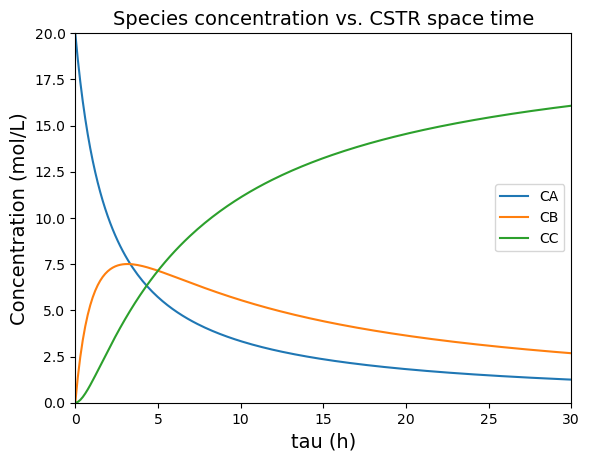

In [3]:
tauset = np.linspace(0, 30, 200)
plt.plot(tauset, CA(tauset), label = 'CA')
plt.plot(tauset, CB(tauset), label = 'CB')
plt.plot(tauset, CC(tauset), label = 'CC')
plt.title('Species concentration vs. CSTR space time', fontsize = 14)
plt.xlabel('tau (h)', fontsize = 14)
plt.ylabel('Concentration (mol/L)', fontsize = 14)
plt.xlim(0, max(tauset))
plt.ylim(0, 20)
plt.legend()
plt.show()

#### Defining Conversion, Selectivities, and Yields

With the concentrations of each species defined, we can now consider Conversion, Yields and Selectivities. 

#### Conversion

We define the fractional conversion of A as:

$$X_A = \frac{F_{A,f} - F_A}{F_{A,f}}$$

Although we have no way to solve for molar flowrates (since Q is unknown), we can express them in terms of concentrations, noting symbolically that $Q = Q_f$.

$$X_A = \frac{C_{A,f}Q_f - C_AQ_f}{C_{A,f}Q_f}$$

We can factor and cancel the volumetric flowrate, giving us the result below, which is always true for a constant density fluid:

$$X_A = \frac{C_{A,f} - C_A}{C_{A,f}}$$

#### Yields

For a flow reactor, we would generally define the yield of B with respect to A as:

$$Y_{B/A} = \frac{F_B\left|\frac{\nu_{A1}}{\nu_{B1}}\right|}{F_{A,f}}$$

Which simplfies for this problem to:

$$Y_{B/A} = \frac{F_B}{F_{A,f}}$$

We actually don't know the molar flowrates since we don't know the size (Q, V) of this system, but we can express these in terms of concentrations, noting that since density is constant $Q = Q_f$:

$$Y_{B/A} = \frac{C_BQ_f}{C_{A,f}Q_f}$$

This reduces to:

$$Y_{B/A} = \frac{C_B}{C_{A,f}}$$

When we go to calculate a yield of C with respect to A, we have to note that by summing the two reactions, we can get the overall stoichiometry of converting A into C:

$$A \longrightarrow C$$

With that, we can use a similar approach to that above to define the yield to C in terms of concentrations:

$$Y_{C/A} = \frac{C_C}{C_{A,f}}$$

#### Selectivities

We can define the selectivity of species B with respect to A:

$$S_{B/A} = \frac{F_B\left|\frac{\nu_{A1}}{\nu_{B1}}\right|}{F_{A,f} - F_A}$$

Substituting stoichiometric coefficients, expressing in terms of concentrations, and noting that $Q = Q_f$:

$$S_{B/A} = \frac{C_BQ_f}{C_{A,f}Q_f - C_AQ_f}$$

Factoring and cancelling the volumetric flowrate (which we can do in cases where it is constant):

$$S_{B/A} = \frac{C_B}{C_{A,f} - C_A}$$

You can follow similar steps to define a selectivity to species C with respect to the reactant A:

$$S_{C/A} = \frac{C_C}{C_{A,f} - C_A}$$

We'll write lambda functions for each of these; note that I'm re-using my concentration functions defined above.

In [4]:
YB = lambda tau: CB(tau)/CAf
YC = lambda tau: CC(tau)/CAf
SB = lambda tau: CB(tau)/(CAf - CA(tau))
SC = lambda tau: CC(tau)/(CAf - CA(tau))
XA = lambda tau: (CAf - CA(tau))/CAf

Now we can plot everything for a graphical analysis; note, this will throw a warning because we divde by zero at some point.  This occurs at 0 tau, where $C_A = C_{A,f}$, causing a zero in the denominator of our selectivity expressions.  In this case, Python just reports the error and moves on, but just know that there is an infinity or a NAN value in our selectivity data.  In some cases, this may cause us problems, so we should know where the error is coming from and how we can deal with it.

C:\Users\Jesse Bond\AppData\Local\Temp\ipykernel_15064\3616170257.py:3: RuntimeWarning: invalid value encountered in divide
  SB = lambda tau: CB(tau)/(CAf - CA(tau))
C:\Users\Jesse Bond\AppData\Local\Temp\ipykernel_15064\3616170257.py:4: RuntimeWarning: invalid value encountered in divide
  SC = lambda tau: CC(tau)/(CAf - CA(tau))


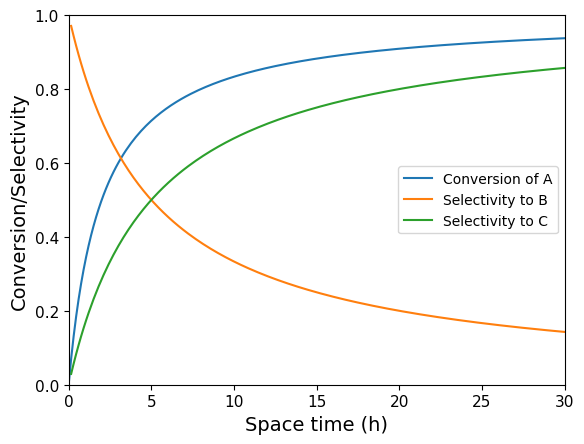

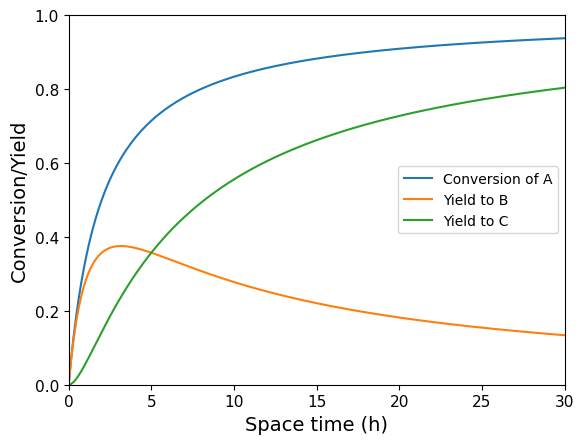

In [5]:
#This just prints out the first few selectivities to show the NAN ("not a number") error
#print(np.array([SB(tauset)[0:5], SC(tauset)[0:5]]).T) 

plt.figure(1)
plt.plot(tauset, XA(tauset), label = 'Conversion of A')
plt.plot(tauset, SB(tauset), label = 'Selectivity to B')
plt.plot(tauset, SC(tauset), label = 'Selectivity to C')
plt.xlabel('Space time (h)', fontsize = 14)
plt.ylabel('Conversion/Selectivity', fontsize = 14)
plt.xlim(0,30)
plt.xticks(fontsize = 11)
plt.ylim(0,1)
plt.yticks(fontsize = 11)
plt.legend()
plt.show(1)

plt.figure(2)
plt.plot(tauset, XA(tauset), label = 'Conversion of A')
plt.plot(tauset, YB(tauset), label = 'Yield to B')
plt.plot(tauset, YC(tauset), label = 'Yield to C')
plt.xlabel('Space time (h)', fontsize = 14)
plt.ylabel('Conversion/Yield', fontsize = 14)
plt.xlim(0,30)
plt.xticks(fontsize = 11)
plt.ylim(0,1)
plt.yticks(fontsize = 11)
plt.legend()
plt.show(2)

#### Maximizing the Yield of B

An important question is clearly what space time do we need to use to maximize the yield to species B (the intermediate in the series reaction).  From the graph of Yield vs. tau, we can see this occurs at a space time of about 3 hours.  To get more precise, we can either solve it analytically by taking a derivative of $Y_{B/A}$ with respect to tau; after some calculus and algebra, we get:

$$\frac{dY_{B/A}}{d\tau} = \frac{k_1(1 + k_1\tau)(1 + k_2\tau) - k_1\tau\left[k_1(1 + k_2\tau) + k_2(1 + k_1\tau)\right]}{\left[(1 + k_1\tau)(1+k_1\tau)\right]^2}$$

To find the optimum value of tau, we solve the following expression for $\tau$:

$$0 = \frac{k_1(1 + k_1\tau)(1 + k_2\tau) - k_1\tau\left[k_1(1 + k_2\tau) + k_2(1 + k_1\tau)\right]}{\left[(1 + k_1\tau)(1+k_1\tau)\right]^2}$$

I did this by hand to find:

$$\tau_{\textrm{opt}} = \sqrt{\frac{1}{k_1k_2}}$$ 

Which we can plug into a calculator to get:

$$\tau_{\textrm{opt}} = 3.16 \ \textrm{h}$$ 

Or, you know, we could just create an objective function (return negative yield of B at a specific volume) and minimize that with an optimization routine.  See below.  You get the same answer.

In [6]:
obj    = lambda tau: -1*YB(tau) #this objective function returns -1*YB for a given value of tau
optsol = opt.minimize_scalar(obj) #this varies tau until we hit minimum value of -1*YB
print(optsol, '\n')

print(f'The maximum yield to species B is {-1*optsol.fun:3.2f} which occurs at a space time of {optsol.x:3.2f} hours')

 message: 
          Optimization terminated successfully;
          The returned value satisfies the termination criteria
          (using xtol = 1.48e-08 )
 success: True
     fun: -0.3752470442573563
       x: 3.162277615990361
     nit: 11
    nfev: 16 

The maximum yield to species B is 0.38 which occurs at a space time of 3.16 hours


## Example Problem 02

**This is a slightly modified version of Example 8.5 from Fogler**
			
The gas-phase reactions given below are carried out in an isobaric (constant pressure) Packed Bed Reactor

\begin{align}
    A + 2B &\longrightarrow C\\
    2A + 3C &\longrightarrow D
\end{align}

Both reactions follow elementary rate laws (though neither reaction is truly an elementary reaction). 

We have the following data available:

\begin{align}
    k_1 &= 100 \ \textrm{L}^{3} \ \textrm{mol}^{-2} \ \textrm{kg}^{-1} \ \textrm{min}^{-1} \\
    k_2 &= 500 \ \textrm{L}^{5} \ \textrm{mol}^{-4} \ \textrm{kg}^{-1} \ \textrm{min}^{-1} \\
    C_{T,f} &= 0.2 \ \textrm{mol} \ \textrm{L}^{-1}\\
    T &= 573 \ \textrm{K}\\
    F_{Af} &= 10 \ \textrm{mol} \ \textrm{min}^{-1}\\
    F_{Bf} &= 10 \ \textrm{mol} \ \textrm{min}^{-1}\\
\end{align} 

1. plot $X_A$, $Y_{C/A}$, $Y_{D/A}$, $S_{C/A}$, and $S_{D/A}$ as a function of catalyst mass (up to 1000kg of catalyst).

2. what catalyst mass would you recommend in order to maximize the *selectivity* toward C in this reactor?  

3. what catalyst mass would you recommend in order to maximize the *yield* of C in this reactor?

### Solution to Example Problem 02

Start by writing material balances on each species.  Packed bed balances are almost identical to PFR balances, except we use mass of catalyst instead of volume as the independent variable (the one that defines the size of the reactor), and we write our intensive rate law in units of moles per mass of catalyst per time.  Hence:

\begin{align}
    \frac{dF_A}{dW} &= {R_A}^\prime \\
    \frac{dF_B}{dW} &= {R_B}^\prime \\
    \frac{dF_C}{dW} &= {R_C}^\prime \\
    \frac{dF_D}{dW} &= {R_D}^\prime \\
\end{align}

Where the prime ($^\prime$) superscript just means that intensive rates are specified per unit mass of catalyst.  Otherwise, intensive production rates are defined as usual.

\begin{align}
    {R_A}^\prime &= -r_1 -2r_2 \\
    {R_B}^\prime &= -2r_1 \\
    {R_C}^\prime &= r_1 -3r_2 \\
    {R_D}^\prime &= r_2 \\
\end{align}

These reactions have elementary kinetics, so:

\begin{align}
    r_1 &= k_1C_AC_B^2 \\
    r_2 &= k_2CA^2C_C^3 \\
\end{align}

We define concentrations in terms of flowrates (dependent variables) as usual for a tubular reactor:

\begin{align}
    C_A &= F_A/Q \\
    C_B &= F_B/Q \\
    C_C &= F_C/Q \\
\end{align}

Since this is a gas-phase reaction at low pressure, we can define Q using the ideal gas law:

$$Q = \frac{F_TRT}{P}$$

And since we know the reactor is isobaric, we can calculate the total pressure from the total feed concentration of species:

$$P = C_{T,f}RT$$

At this point, everything on the right-hand side of our ODEs is defined in terms of our dependent variables, so we're good to solve with solve_ivp.

We do want to define conversion, selectivity, and yield in terms of molar flowrates since our problem statement asks us to plot these quantities.

#### Conversion

We define conversion as usual:

$$X_A = \frac{F_{Af} - F_A}{F_{Af}}$$

#### Selectivities

Based on the stoichiometry of the first reaction, we can see that 1 mole of C requires 1 mole of A. The overall selectivity to C would therefore be defined as:

$$S_{C/A} = \frac{F_C}{F_{Af} - F_A}$$

The stoichiometric relationship between species A and species D is less clear from the two reactions given; however, if we sum them up:

\begin{align}
    A + 2B &\longrightarrow C\\
    2A + 3C &\longrightarrow D \\
    \hline
    5A + 6B &\longrightarrow D
\end{align}

With that, we can see that producing 1 mole of D will consume 5 moles of A, so:

$$S_{D/A} = \frac{5F_D}{F_{Af} - F_A}$$

#### Yields

We use the same insights about stoichiometry discussed above in order to define yields to C and D:

\begin{align}
    Y_{C/A} = \frac{F_C}{F_{Af}} \\
    Y_{D/A} = \frac{5F_D}{F_{Af}} \\
\end{align}



In [7]:
def P02(W, var):
    FA, FB, FC, FD = var
    FT = FA + FB + FC + FD
    
    k1  = 100 #L^3/mol^2/kg/min
    k2  = 500 #L^5/mol^4/kg/min    
    CAf = 0.2 #mol/L
    T   = 573 #K
    R   = 0.08206 #L*atm/mol/K
    P   = CAf*R*T
    Q   = FT*R*T/P
    
    CA  = FA/Q
    CB  = FB/Q
    CC  = FC/Q
    
    r1  = k1*CA*CB**2
    r2  = k2*CA**2*CC**3
    
    RA  = -r1 -2*r2
    RB  = -2*r1
    RC  = r1 - 3*r2
    RD  = r2
    
    return [RA, RB, RC, RD]    

C:\Users\Jesse Bond\AppData\Local\Temp\ipykernel_15064\3189117652.py:20: RuntimeWarning: invalid value encountered in divide
  SCA = FC/(FAf - FA)
C:\Users\Jesse Bond\AppData\Local\Temp\ipykernel_15064\3189117652.py:21: RuntimeWarning: invalid value encountered in divide
  SDA = 5*FD/(FAf - FA)


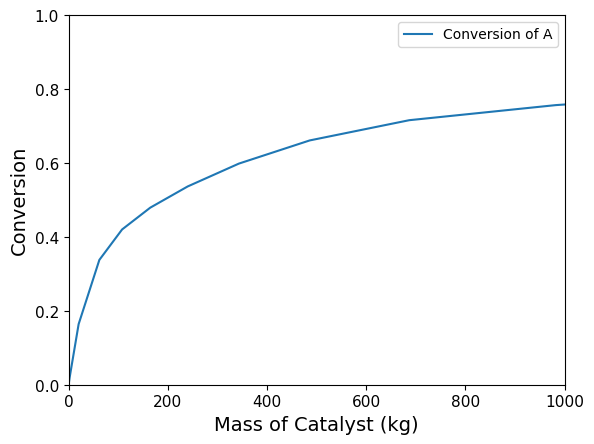

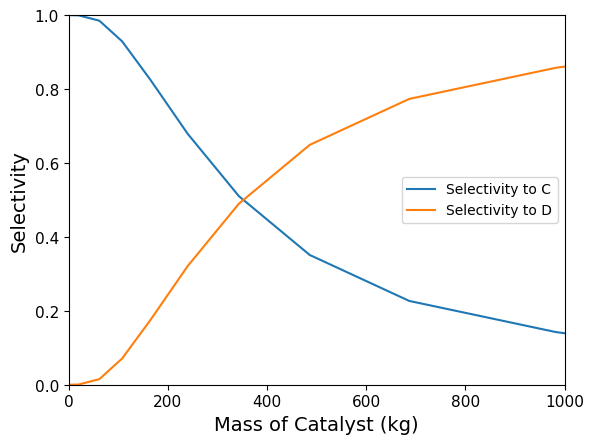

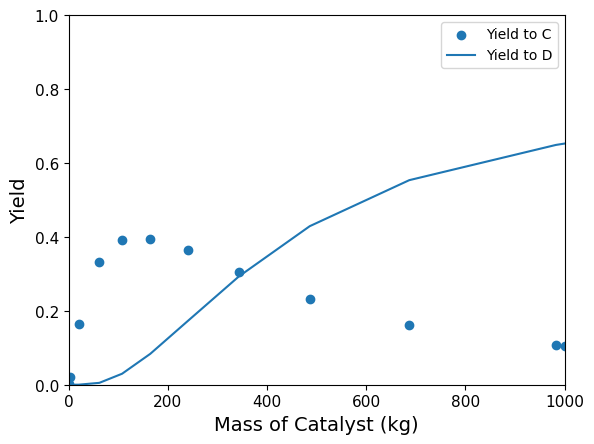

In [8]:
FAf = 10 #mol/min
FBf = 10 #mol/min
FCf = 0  #mol/min
FDf = 0  #mol/min

var0 = [FAf, FBf, FCf, FDf]

Wspan = (0, 1000) #kg catalyst

answer = solve_ivp(P02, Wspan, var0, atol = 1e-3, rtol = 1e-3)

W  = answer.t
FA = answer.y[0]
FB = answer.y[1]
FC = answer.y[2]
FD = answer.y[3]

XA  = (FAf - FA)/FAf

SCA = FC/(FAf - FA)
SDA = 5*FD/(FAf - FA)

YCA = FC/FAf
YDA = 5*FD/FAf

plt.figure(1)
plt.plot(W, XA, label = 'Conversion of A')
plt.xlim(0, 1000)
plt.ylim(0, 1)
plt.xlabel('Mass of Catalyst (kg)', fontsize = 14)
plt.xticks(fontsize = 11)
plt.ylabel('Conversion', fontsize = 14)
plt.yticks(fontsize = 11)
plt.legend()

plt.figure(2)
plt.plot(W, SCA, label = 'Selectivity to C')
plt.plot(W, SDA, label = 'Selectivity to D')
plt.xlim(0, 1000)
plt.ylim(0, 1)
plt.xlabel('Mass of Catalyst (kg)', fontsize = 14)
plt.xticks(fontsize = 11)
plt.ylabel('Selectivity', fontsize = 14)
plt.yticks(fontsize = 11)
plt.legend()

plt.figure(3)
plt.scatter(W, YCA, label = 'Yield to C')
plt.plot(W, YDA, label = 'Yield to D')
plt.xlim(0, 1000)
plt.ylim(0, 1)
plt.xlabel('Mass of Catalyst (kg)', fontsize = 14)
plt.xticks(fontsize = 11)
plt.ylabel('Yield', fontsize = 14)
plt.yticks(fontsize = 11)
plt.legend()
plt.show()

#### Optimizing Yields and Selectivities

Here, we have the classic problem in maximizing selectivity/yield to the intermediate species in a sequence of reactions.  Selectivity is maximizing by operating as close to zero conversion as possible.  This is because, in this limit, the concentration of species C is near zero, so the rate of the second reaction is near zero.  Unfortunately, since yield is the product of conversion and selectivity, the yield of C also approaches zero at zero conversion.  To produce a viable quantity of product C, you'll have to tolerate some loss of selectivity -- The point of maximum yield will be the mass of catalyst where conversion has increased enough to produce an appreciable quantity of C, but not so much that we are producing mostly D.  As shown below, this occurs at 140 kg of catalyst, where we find a maximum yield of B of approximately 40%.

In [9]:
YIELD   = interp1d(W, YCA)  #This gives me yield as a continuous function of W
#OBJ     = lambda W: YIELD(W)*-1  #I want to minimize negative yield.
def OBJ(W):
    if 0 <= W <= 1000:
        print([W, YIELD(W)])
    else:
        print(f'Error: {W}kg of catalyst is outside interpolation range')
    return -1*YIELD(W)

answer2 = opt.minimize_scalar(OBJ)
W_opt   = answer2.x

print(f'The maximum yield of C is {YIELD(W_opt):0.2f} at a catalyst loading of {W_opt:0.0f}kg')

[0.0, array(0.)]
[1.0, array(0.0098198)]
[2.6180339999999998, array(0.02451275)]
[17.892964975441355, array(0.14608862)]
[42.60832264135863, array(0.25468483)]
[54.8926563161009, array(0.30430925)]
[74.76912586917882, array(0.34880455)]
[84.8177098060513, array(0.36144965)]
[101.07666026776482, array(0.38190987)]
Error: 1873.302260594539kg of catalyst is outside interpolation range


ValueError: A value (1873.302260594539) in x_new is above the interpolation range's maximum value (1000.0).